In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import pickle

In [2]:
directory=r'dataset'
catagories=['covid-19','normal']

In [3]:
img_size=100
data=[]
for catagory in catagories:
    folder=os.path.join(directory,catagory)
    label=catagories.index(catagory)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])
            

In [4]:
len(data)

200

In [5]:
x=[]
y=[]
for features, labels in data:
    x.append(features)
    y.append(labels)

In [6]:
x=np.array(x)
y=np.array(y)

In [7]:
x.shape

(200, 100, 100, 3)

In [8]:
y.shape

(200,)

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0,stratify = y)

In [10]:
x_train.shape

(160, 100, 100, 3)

In [11]:
x_test.shape

(40, 100, 100, 3)

In [12]:
y_train.shape

(160,)

In [13]:
y_test.shape

(40,)

In [14]:
y_train[:5]

array([0, 0, 0, 0, 1])

In [15]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(catagories[y[index]])

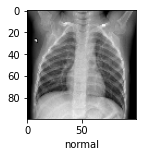

In [16]:
plot_sample(x_train, y_train, 6)

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
x_train

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.03921569, 0.03921569, 0.03921569],
         [0.12156863, 0.12156863, 0.12156863]

In [19]:
x_test

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00784314, 0.00784314, 0.00784314]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.07843137, 0.07843137, 0.07843137]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.01176471, 0.01176471, 0.01176471],
         [0.0627451 , 0.0627451 , 0.0627451 ]],

        ...,

        [[0.18431373, 0.18431373, 0.18431373],
         [0.31764706, 0.31764706, 0.31764706]

In [20]:
from keras.models import *
from keras.layers import *
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [24]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'tanh',input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'tanh'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'tanh'))

model.add(Dense(2, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4333696   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [28]:
class_names=['covid-19','normal']

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history=model.fit(x_train, y_train, epochs=12,validation_data=(x_test, y_test))

Epoch 1/12
5/5 [==============================] - 49s 10s/step - loss: 3.3282 - accuracy: 0.5750 - val_loss: 0.1225 - val_accuracy: 0.9250
Epoch 2/12
5/5 [==============================] - 42s 8s/step - loss: 0.3367 - accuracy: 0.8813 - val_loss: 0.4832 - val_accuracy: 0.7500
Epoch 3/12
5/5 [==============================] - 42s 8s/step - loss: 0.3650 - accuracy: 0.8375 - val_loss: 0.4896 - val_accuracy: 0.7000
Epoch 4/12
5/5 [==============================] - 49s 10s/step - loss: 0.3319 - accuracy: 0.8813 - val_loss: 0.1376 - val_accuracy: 0.9750
Epoch 5/12
5/5 [==============================] - 43s 9s/step - loss: 0.2610 - accuracy: 0.9062 - val_loss: 0.1572 - val_accuracy: 0.9750
Epoch 6/12
5/5 [==============================] - 45s 9s/step - loss: 0.1962 - accuracy: 0.9500 - val_loss: 0.2306 - val_accuracy: 0.9250
Epoch 7/12
5/5 [==============================] - 52s 10s/step - loss: 0.1968 - accuracy: 0.9375 - val_loss: 0.1255 - val_accuracy: 0.9500
Epoch 8/12
5/5 [===============

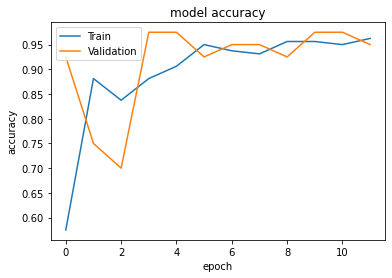

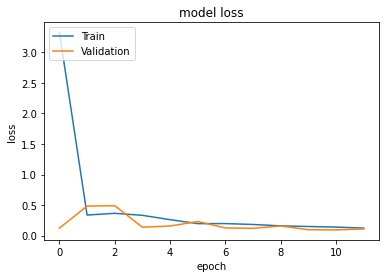

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


In [33]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[0.9790041 , 0.02099591],
       [0.04771683, 0.95228314],
       [0.9389238 , 0.06107618],
       [0.998973  , 0.00102696],
       [0.9819516 , 0.0180484 ]], dtype=float32)

In [34]:
y_test_args=np.argmax(y_test,axis=1)


y_pred_args = np.argmax(y_pred,axis=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x719b3746d0>)

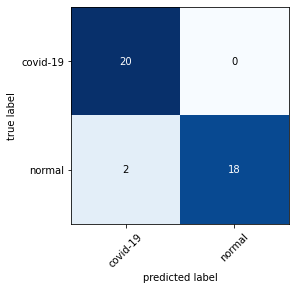

In [35]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix



cm=confusion_matrix(y_test_args,y_pred_args)
plot_confusion_matrix(cm,class_names=class_names)

TypeError: only integer scalar arrays can be converted to a scalar index

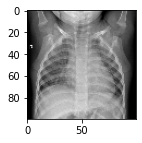

In [37]:
plot_sample(x_test, y_test, 5)

In [ ]:
accuracy_cnn=accuracy_score(y_test_args, y_pred_args)
precision_cnn=precision_score(y_test_args,y_pred_args,average="micro")
recall_cnn=recall_score(y_test_args,y_pred_args,average="micro")
classification_cnn=classification_report(y_test_args,y_pred_args,target_names=class_names)
f1score_cnn=f1_score(y_test_args,y_pred_args,average="micro")
print("accuracy score:", accuracy_cnn)
print("precision:", precision_cnn)
print("recall:", recall_cnn)
print("f1 score:",f1score_cnn)
print("classification report:")
print(classification_cnn)